## Model Performance for Radar Data

All models are trained on data from fall 2016 and 2017. Hyperparameters have been tuned using 25% of the data from fall 2015.

The final model performance is evaluated on the remaining 75% of fall 2015.

Model performance is quantified using the Root Mean-Squared Error (RMSE), where only available timepoints during the night are considered.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import torch
import os.path as osp
import seaborn as sb
from matplotlib import pyplot as plt
import glob
import utils
from yaml import Loader, load

In [2]:
base_dir = '/home/fiona/birdMigration/results/radar'

### Load Results

In [3]:
models = ['GBT', 'LocalMLP', 'LocalLSTM', 'BirdFlowGraphLSTM'] #, 'GraphLSTM']
experiments = ['_not_transformed', '_not_transformed', '_new', '_new', '_new']
results = dict()
for i, m in enumerate(models):
    experiment = 'best_settings' + experiments[i]
    model_dir = osp.join(base_dir, 'testing', m, experiment)
    files = glob.glob(model_dir + "/**/results.csv", recursive = True)
    results[m] = pd.read_csv(files[0])

In [28]:
bird_scales = dict()
for i, m in enumerate(models):
    experiment = 'best_settings' + experiments[i]
    fp = osp.join(base_dir, 'training', m, experiment, 'config.yaml')
    with open(fp) as f:
        cfg = load(f, Loader=Loader)
    #bird_scales[m] = cfg['datasource']['bird_scale']
    print(cfg)

{'experiment': 'best_settings_not_transformed', 'root': '/home/flipper/birdMigration', 'season': 'fall', 'seed': 1234, 'repeats': 5, 'cuda': False, 'root_transform': 0, 'missing_data_threshold': 0.1, 'datasource': {'name': 'radar', 'training_years': [2016, 2017], 'validation_year': 2015, 'test_year': 2015, 'val_test_split': 0.25, 'env_vars': ['u', 'v', 'cc', 'tp', 'sp', 't2m', 'sshf'], 'use_buffers': True, 'bird_scale': 9938497.9440479}, 'action': {'name': 'training', 'grid_search': False}, 'model': {'name': 'GBT', 'hyperparameters': {'n_estimators': {'default': 100, 'search_space': [100]}, 'lr': {'default': 0.1, 'search_space': [0.01, 0.05, 0.1, 0.2, 0.3]}, 'max_depth': {'default': 6, 'search_space': [4, 6, 8, 10, 12]}}, 'timesteps': 16, 'tolerance': 1e-08}}


FileNotFoundError: [Errno 2] No such file or directory: '/home/fiona/birdMigration/results/radar/training/LocalMLP/best_settings_not_transformed/config.yaml'

### Raw data

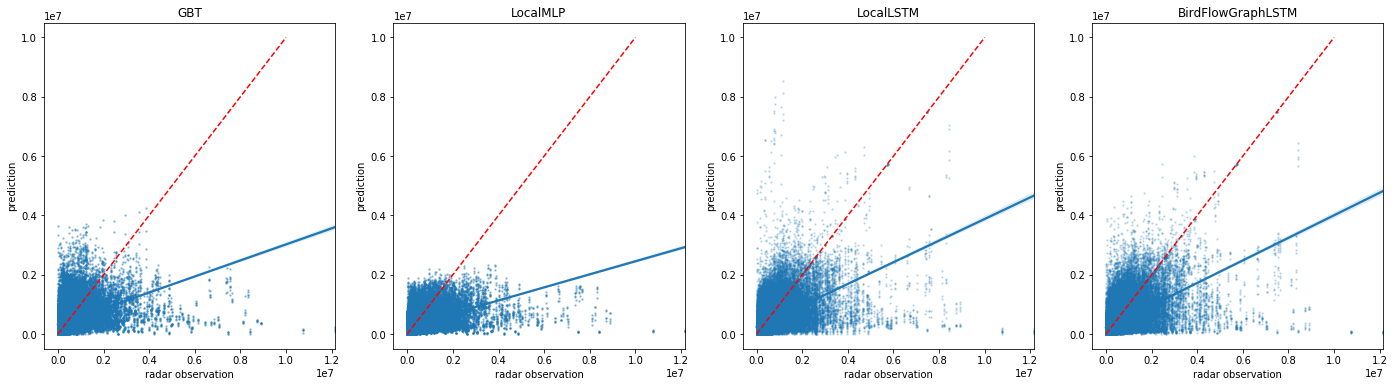

In [4]:
fig = utils.plot_results_scatter(results)

### Power-transformed data with exponent p=1/3

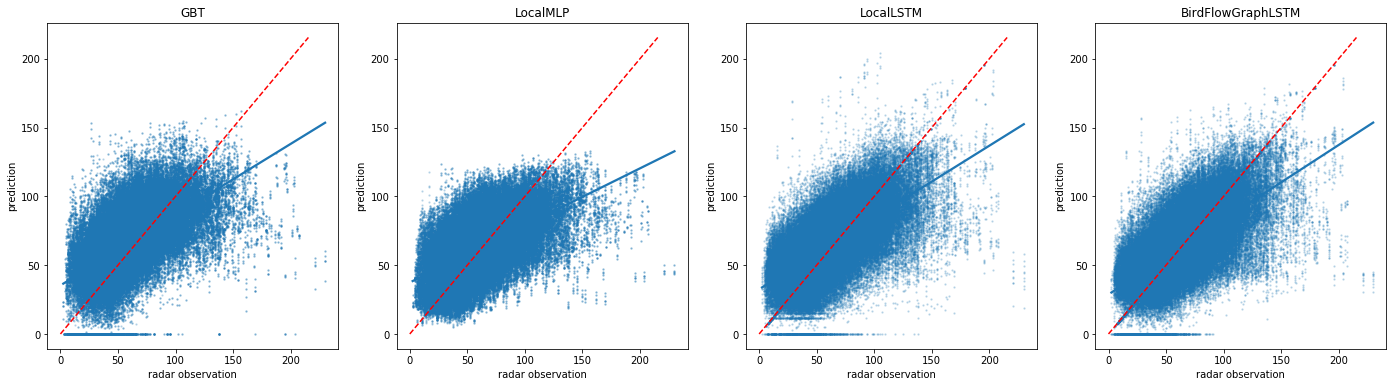

In [6]:
fig = utils.plot_results_scatter(results, root_transform=3)

In [ ]:
fig = utils.plot_example_prediction(results, radar, seqID, bird_scale=1, max=1)

In [7]:
results['BirdFlowGraphLSTM']

,Unnamed: 0,gt,prediction,night,radar,seqID,tidx,datetime,trial,horizon,missing,outflux,outflux_abs,delta
0,0,98960.3600,98960.360,True,nldbl,0,631,2015-08-27 19:00:00+00:00,0,0,False,0.000000,0.000000,0.000000
1,1,131417.6000,114854.516,True,nldbl,0,632,2015-08-27 20:00:00+00:00,0,1,False,0.911383,0.009075,0.002473
2,2,119623.6200,122182.780,True,nldbl,0,633,2015-08-27 21:00:00+00:00,0,2,False,0.900214,0.010403,0.001870
3,3,122655.3400,126570.080,True,nldbl,0,634,2015-08-27 22:00:00+00:00,0,3,False,0.882174,0.010845,0.001870
4,4,107930.8300,126843.766,True,nldbl,0,635,2015-08-27 23:00:00+00:00,0,4,False,0.853911,0.010875,0.001870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356285,356285,7676.7407,29074.703,True,nldhl,78,2536,2015-11-15 04:00:00+00:00,4,36,False,0.226730,0.000685,0.002237
356286,356286,0.0000,28719.488,True,nldhl,78,2537,2015-11-15 05:00:00+00:00,4,37,False,0.221745,0.000649,0.002237
356287,356287,67201.6000,29247.410,True,nldhl,78,2538,2015-11-15 06:00:00+00:00,4,38,False,0.243005,0.000702,0.002237
356288,356288,0.0000,0.000,False,nldhl,78,2539,2015-11-15 07:00:00+00:00,4,39,False,0.000000,0.000000,0.000000
